# Task 2:Intermediate Level Task:Prediction using Decision Tree Algorithm

# Desgined by Ippili Amruta

Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score  
from sklearn.tree import plot_tree
from sklearn import tree

# Loading the  dataset

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.size

900

# Description of iris data

In [6]:
iris.shape

(150, 6)

In [7]:
iris.describe(include="all")

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,74.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,0.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,37.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,74.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,111.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking the null values

In [9]:
iris.isnull().any().any()

False

In [10]:
iris.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Pair plot

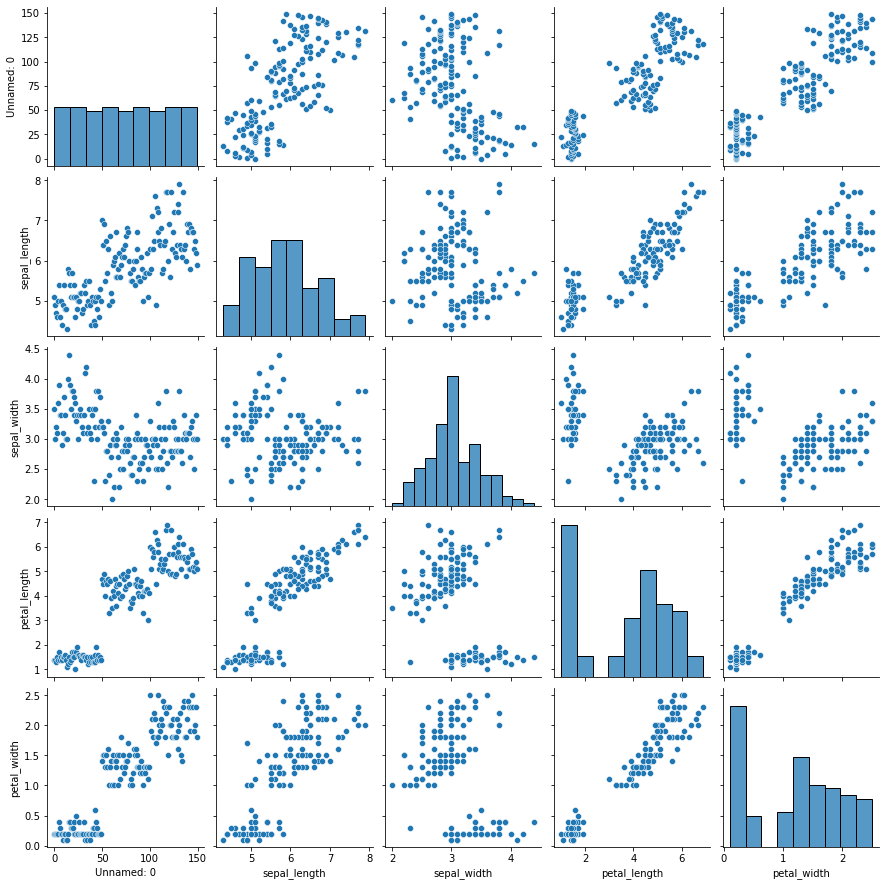

In [11]:
sb.pairplot(iris)

# Boxplot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

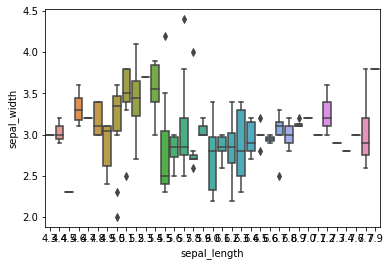

In [12]:
sb.boxplot(x = iris.sepal_length, y = iris.sepal_width)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

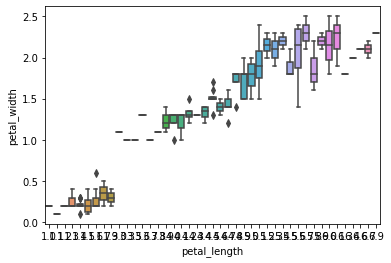

In [13]:
sb.boxplot(x = iris.petal_length, y = iris.petal_width)

# Correlation_matrix

In [14]:
iris.corr()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
Unnamed: 0,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


In [15]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

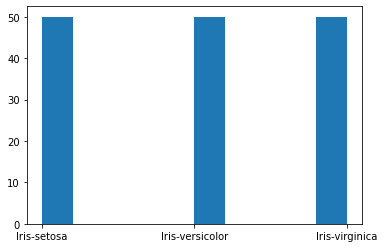

In [16]:
plt.hist(iris.species)

# Checking the value_counts

In [17]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Using the Label encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Encoded Species']=le.fit_transform(iris['species'])

In [19]:
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,Encoded Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [20]:
X=iris.drop(["species"],axis=1)
y=iris["species"]

# Test and Train

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Decision Tree classifier

In [22]:
dtree=DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predicting/Evaluating Decision tree

In [24]:
prediction=dtree.predict(X_test)

In [25]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# Confusion Matrix

In [26]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Accuracy Score

In [27]:
print(accuracy_score(y_test,prediction)*100,"%")

100.0 %


# Tree Visualization

[Text(334.79999999999995, 453.0, 'X[0] <= 99.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(223.2, 271.8, 'X[3] <= 2.45\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(111.6, 90.59999999999997, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.79999999999995, 90.59999999999997, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(446.4, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

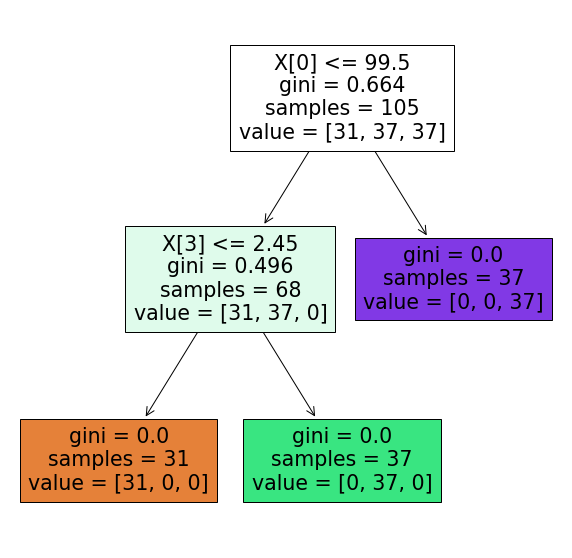

In [28]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree,filled=True)